<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assignment-#9-." data-toc-modified-id="Assignment-#9-.-1">Assignment #9 .</a></span><ul class="toc-item"><li><span><a href="#Time-series-analysis" data-toc-modified-id="Time-series-analysis-1.1">Time series analysis</a></span></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-1.2">Data preparation</a></span></li><li><span><a href="#Predicting-with-FB-Prophet" data-toc-modified-id="Predicting-with-FB-Prophet-1.3">Predicting with FB Prophet</a></span><ul class="toc-item"><li><span><a href="#Question-1:-What-is-the-prediction-for-1st-of-January-17-00:00:00?" data-toc-modified-id="Question-1:-What-is-the-prediction-for-1st-of-January-17-00:00:00?-1.3.1"><font color="red">Question 1:</font> What is the prediction for 1st of January 17 00:00:00?</a></span></li><li><span><a href="#Question-2:-What-is-MAPE-equal-to?" data-toc-modified-id="Question-2:-What-is-MAPE-equal-to?-1.3.2"><font color="red">Question 2:</font> What is MAPE equal to?</a></span></li><li><span><a href="#Question-3:-What-is-MAE-equal-to?" data-toc-modified-id="Question-3:-What-is-MAE-equal-to?-1.3.3"><font color="red">Question 3:</font> What is MAE equal to?</a></span></li></ul></li><li><span><a href="#Predicting-with-ARIMA" data-toc-modified-id="Predicting-with-ARIMA-1.4">Predicting with ARIMA</a></span><ul class="toc-item"><li><span><a href="#Question-4:-What's-the-stationarity?" data-toc-modified-id="Question-4:-What's-the-stationarity?-1.4.1"><font color="red">Question 4:</font> What's the stationarity?</a></span></li><li><span><a href="#Question-5:-Best-hyperparameters-before-Box-Cox-transformation?" data-toc-modified-id="Question-5:-Best-hyperparameters-before-Box-Cox-transformation?-1.4.2"><font color="red">Question 5:</font> Best hyperparameters before Box-Cox transformation?</a></span></li><li><span><a href="#Question-6:-Best-hyperparameters-after-Box-Cox-transformation?" data-toc-modified-id="Question-6:-Best-hyperparameters-after-Box-Cox-transformation?-1.4.3"><font color="red">Question 6:</font> Best hyperparameters after Box-Cox transformation?</a></span></li><li><span><a href="#Question-7:-Draw-final-prediction-and-historical-data" data-toc-modified-id="Question-7:-Draw-final-prediction-and-historical-data-1.4.4"><font color="red">Question 7:</font> Draw final prediction and historical data</a></span></li></ul></li></ul></li></ul></div>

<center>
<img src="https://habrastorage.org/files/fd4/502/43d/fd450243dd604b81b9713213a247aa20.jpg">
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
<center>Author: [Mariya Mansurova](https://www.linkedin.com/in/mariya-mansurova-04070982/), analyst & developer in Yandex.Metrics team. <br>Translated by [Ivan Zakharov](https://www.linkedin.com/in/ivan-zakharov/), ML enthusiast.
<br>All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

# Assignment #9 . 
## Time series analysis

<font color='red'>Fill cells marked with "Your code here" and write answer below question after text "Type your answer here:"
    </font>    

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
import requests

from plotly import __version__
print(__version__) # need 1.9.0 or greater
init_notebook_mode(connected = True)


def plotly_df(df, title = ''):
    data = []
    
    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)
    
    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

4.5.2


## Data preparation

In [2]:
df = pd.read_csv('hour_online.csv')
df = df[df['Users'] != 0]
df.head()

,Time,Users
0,1/1/17 0:00,34002
1,1/1/17 1:00,37947
2,1/1/17 2:00,41517
3,1/1/17 3:00,44476
4,1/1/17 4:00,46234


In [3]:
df.shape

(2616, 2)

## Predicting with FB Prophet
We will train at first 5 months and predict the number of trips for June.

In [4]:
df.Time = pd.to_datetime(df.Time)

In [5]:
plotly_df(df.set_index('Time')[["Users"]])

In [6]:
from fbprophet import Prophet

In [7]:
predictions = 30

df.columns = ['ds', 'y']
df.tail()

,ds,y
2620,2017-04-20 05:00:00,34833
2621,2017-04-20 06:00:00,35932
2622,2017-04-20 07:00:00,38418
2623,2017-04-20 08:00:00,40238
2624,2017-04-20 09:00:00,40763


In [8]:
train_df = df[:-predictions].copy()

In [9]:
m = Prophet()
m.fit(train_df);

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [10]:
future = m.make_future_dataframe(periods=predictions, freq = 'H')
future.tail()

,ds
2611,2017-04-20 05:00:00
2612,2017-04-20 06:00:00
2613,2017-04-20 07:00:00
2614,2017-04-20 08:00:00
2615,2017-04-20 09:00:00


In [11]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2611,2017-04-20 05:00:00,35313.552909,36942.970621,48602.346837,35305.587922,35313.552909,7401.138199,7401.138199,7401.138199,8788.263876,8788.263876,8788.263876,-1387.125677,-1387.125677,-1387.125677,0.0,0.0,0.0,42714.691108
2612,2017-04-20 06:00:00,35322.168780,39778.426874,51383.053417,35306.316731,35322.801799,10094.722149,10094.722149,10094.722149,11417.666438,11417.666438,11417.666438,-1322.944289,-1322.944289,-1322.944289,0.0,0.0,0.0,45416.890929
2613,2017-04-20 07:00:00,35330.784651,41837.273696,53118.204845,35307.587854,35345.347927,11946.979577,11946.979577,11946.979577,13203.364932,13203.364932,13203.364932,-1256.385356,-1256.385356,-1256.385356,0.0,0.0,0.0,47277.764228
2614,2017-04-20 08:00:00,35339.400522,42929.298867,54633.561820,35296.457310,35363.566932,13551.414423,13551.414423,13551.414423,14739.078775,14739.078775,14739.078775,-1187.664352,-1187.664352,-1187.664352,0.0,0.0,0.0,48890.814945
2615,2017-04-20 09:00:00,35348.016393,44239.221120,55942.085094,35296.557846,35379.432972,14838.393219,14838.393219,14838.393219,15955.382618,15955.382618,15955.382618,-1116.989399,-1116.989399,-1116.989399,0.0,0.0,0.0,50186.409613


### <font color='red'>Question 1:</font> What is the prediction for 1st of January 17 00:00:00?

What is the prediction of the number of views of the wiki page on 1st of January 17? Round to the nearest integer.

- Type your answer here: **39050**


forecast for 1st of January : 39050


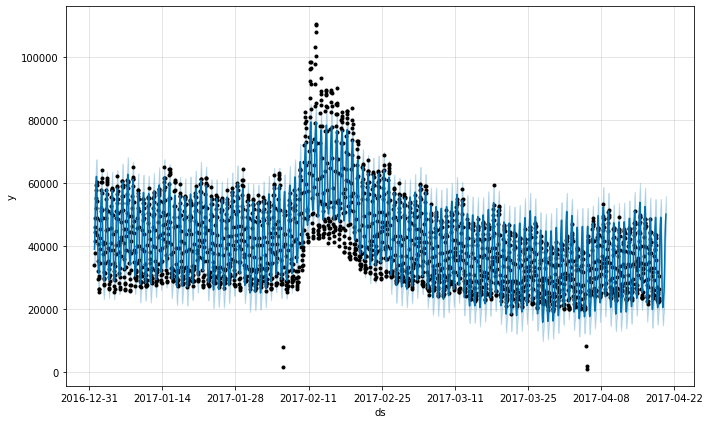

In [12]:
m.plot(forecast);
print('forecast for 1st of January :',
      forecast.loc[forecast.ds =='2017-01-01 00:00:00','yhat'].iloc[0].astype(int))

In [13]:
forecast[forecast['ds'].isin(['2017-01-01 00:00:00'])].T #columns selction

,0
ds,2017-01-01 00:00:00
trend,44113
yhat_lower,33287.2
yhat_upper,45013.8
trend_lower,44113
trend_upper,44113
additive_terms,-5062.34
additive_terms_lower,-5062.34
additive_terms_upper,-5062.34
daily,-8486.17


In [14]:
# You code here
forecast.loc[forecast.ds =='2017-01-01 00:00:00','yhat'].iloc[0].astype(int)

39050

Estimate the quality of the prediction with the last 30 points.

### <font color='red'>Question 2:</font> What is MAPE equal to?

- Type your answer here: **12.69**

### <font color='red'>Question 3:</font> What is MAE equal to?

- Type your answer here: **4349.67**


In [15]:
join_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

In [16]:
join_df.head()

,ds,yhat,y
0,2017-01-01 00:00:00,39050.632700,34002
1,2017-01-01 01:00:00,40341.933912,37947
2,2017-01-01 02:00:00,43149.350471,41517
3,2017-01-01 03:00:00,47360.561810,44476
4,2017-01-01 04:00:00,51930.877842,46234


In [17]:
metric = join_df.tail(n=30)
len(metric)

30

* MAPE: $\frac{100\%}{n}\sum_{t=1}^{n}\left |\frac{e_t}{y_t}\right|$


* MAE = $\frac{1}{n}\sum_{t=1}^{n}|e_t|$

In [18]:
print('MAPE score:  ', round(np.mean(np.abs((metric.y - metric.yhat) / metric.y)) * 100,2))
print('MAE score:  ', round(np.mean(np.abs((metric.y - metric.yhat))),2))

MAPE score:   12.69
MAE score:   4349.67


## Predicting with ARIMA

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (15, 10)

### <font color='red'>Question 4:</font> What's the stationarity?

Let's verify the stationarity of the series using the Dickey-Fuller test. Is the series stationary? What is the p-value?

- Is the series stationary (yes/no)? Answer: **No**

    >- *If the p-value is greater than 0.05 then we say we fail to reject the null hypothesis because the data has a unit root and is non-stationary.*
- What is p_value? Answer: p = **0.240004**

In [20]:
# You code here
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
result = adfuller(train_df['y'], autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('\nCritical Values:')
dict(map(zip, result[4].items()))

Results of Dickey-Fuller Test:
ADF Statistic: -2.111278
p-value: 0.240004

Critical Values:


{('1%',): (-3.432909983133851,),
 ('5%',): (-2.862670998033109,),
 ('10%',): (-2.5673720721755933,)}

**Next, we turn to the construction of the SARIMAX model (`sm.tsa.statespace.SARIMAX`).<br> 
### <font color='red'>Question 5:</font> Best hyperparameters before Box-Cox transformation?


What parameters are the best for the model according to the `AIC` criterion?

- Type answer here: **p = 5, d = 1, q = 6, P = 1, D = 0, Q = 1**

Choose one option:

- p = 3, d = 0, q = 2, P = 2, D = 1, Q = 1
- p = 3, d = 1, q = 6, P = 2, D = 1, Q = 1
- **p = 5, d = 1, q = 6, P = 1, D = 0, Q = 1**
- p = 7, d = 0, q = 7, P = 2, D = 2, Q = 2




In [21]:
# You code here
from tqdm.notebook import tqdm as tqdm
warnings.filterwarnings('ignore')
models = []
best_aic = float("inf")
tuple_ = (3, 0, 2, 2, 1, 1),(3, 1, 6, 2, 1, 1),(5, 1, 6, 1, 0, 1),(7, 0, 7, 2, 2, 2)
for x in tqdm(tuple_):
    print("model parameters (p,d,q,P,D,Q) =",x)
    model=sm.tsa.statespace.SARIMAX(train_df['y'], order=(x[0], x[1], x[2]),
                                    seasonal_order=(x[3], x[4], x[5],10)).fit(disp=-1)
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = x
        models.append([best_param, best_aic])
models_results_before_boxcox = pd.DataFrame(
    models,columns=['parameters', 'aic']).sort_values(by='aic',
                                                      ascending=True)

model parameters (p,d,q,P,D,Q) = (3, 0, 2, 2, 1, 1)
model parameters (p,d,q,P,D,Q) = (3, 1, 6, 2, 1, 1)
model parameters (p,d,q,P,D,Q) = (5, 1, 6, 1, 0, 1)
model parameters (p,d,q,P,D,Q) = (7, 0, 7, 2, 2, 2)



In [22]:
models_results_before_boxcox

,parameters,aic
1,"(5, 1, 6, 1, 0, 1)",47441.105721
0,"(3, 0, 2, 2, 1, 1)",48061.577608


In [23]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 2586
Model:             SARIMAX(5, 1, 6)x(1, 0, [1], 8)   Log Likelihood              -23706.553
Date:                             Sun, 31 May 2020   AIC                          47441.106
Time:                                     23:39:52   BIC                          47523.110
Sample:                                          0   HQIC                         47470.827
                                            - 2586                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7883      0.193      4.076      0.000       0.409       1.167
ar.L2          0.5770      0.094      6.149      0.000       0.393       0.761
ar.L3          0.3098      0.140      2.219      0.026       0.036       0.583
ar.L4         -1.1213      0.101    -11.054      0.000      -1.320      -0.922
ar.L5          0.2889      0.184      1.567      0.117      -0.072       0.650
ma.L1         -0.5845      0.194     -3.014      0.003      -0.965      -0.204
ma.L2         -0.8892      0.061    -14.513      0.000      -1.009      -0.769
ma.L3         -0.4220      0.175     -2.405      0.016      -0.766      -0.078
ma.L4          1.0846      0.139      7.825      0.000       0.813       1.356
ma.L5          0.0136      0.157      0.087      0.931      -0.293       0.321
ma.L6         -0.1462      0.041     -3.527      0.000      -0.227      -0.065
ar.S.L8       -0.7150      0.034    -20.884      0.000      -0.782      -0.648
ma.S.L8        0.8822      0.024     37.205      0.000       0.836       0.929
sigma2      6.326e+06   1.35e-06   4.69e+12      0.000    6.33e+06    6.33e+06
===================================================================================
Ljung-Box (Q):                      586.85   Jarque-Bera (JB):             45325.71
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.38   Skew:                             0.76
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.69e+26. Standard errors may be unstable.
"""

**Next, we turn to the construction of the SARIMAX model (`sm.tsa.statespace.SARIMAX`).<br> 
### <font color='red'>Question 6:</font> Best hyperparameters after Box-Cox transformation?

No do the same as in Question 5, but with Box-Cox transformation.

What is the optimal Box-Cox transformation parameter?

- Type answer here: **p = 7, d = 0, q = 7, P = 2, D = 2, Q = 2**

What parameters are the best for the model according to the `AIC` criterion?

Choose on option:

- p = 3, d = 0, q = 2, P = 2, D = 1, Q = 1
- p = 3, d = 1, q = 6, P = 2, D = 1, Q = 1
- p = 5, d = 1, q = 6, P = 1, D = 0, Q = 1
- **p = 7, d = 0, q = 7, P = 2, D = 2, Q = 2**


Now do the same, but for the series with Box-Cox transformation.

In [24]:
import scipy.stats
train_df['y_box'], lmbda = scipy.stats.boxcox(train_df['y']) 
print("The optimal Box-Cox transformation parameter: %f" % lmbda)

The optimal Box-Cox transformation parameter: 0.246704


In [25]:
# You code here
warnings.filterwarnings('ignore')
models1 = []
best_aic = float("inf")
tuple_ = (3, 0, 2, 2, 1, 1),(3, 1, 6, 2, 1, 1),(5, 1, 6, 1, 0, 1),(7, 0, 7, 2, 2, 2)
for x in tqdm(tuple_):
    print("model parameters (p,d,q,P,D,Q) =",x)
    model=sm.tsa.statespace.SARIMAX(train_df['y_box'], order=(x[0], x[1], x[2]),
                                    seasonal_order=(x[3], x[4], x[5],10)).fit(disp=-1)
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = x
        models1.append([best_param, best_aic])
models_results_after_boxcox = pd.DataFrame(
    models1,columns=['parameters', 'aic']).sort_values(by='aic',
                                                      ascending=True)

model parameters (p,d,q,P,D,Q) = (3, 0, 2, 2, 1, 1)
model parameters (p,d,q,P,D,Q) = (3, 1, 6, 2, 1, 1)
model parameters (p,d,q,P,D,Q) = (5, 1, 6, 1, 0, 1)
model parameters (p,d,q,P,D,Q) = (7, 0, 7, 2, 2, 2)



In [26]:
models_results_after_boxcox

,parameters,aic
3,"(7, 0, 7, 2, 2, 2)",8294.525409
2,"(5, 1, 6, 1, 0, 1)",8569.788862
1,"(3, 1, 6, 2, 1, 1)",8846.761604
0,"(3, 0, 2, 2, 1, 1)",8893.308913


In [27]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                  y_box   No. Observations:                 2586
Model:             SARIMAX(7, 0, 7)x(2, 2, [1, 2], 8)   Log Likelihood               -4128.263
Date:                                Sun, 31 May 2020   AIC                           8294.525
Time:                                        23:42:20   BIC                           8405.707
Sample:                                             0   HQIC                          8334.833
                                               - 2586                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6926      0.389      4.351      0.000       0.930       2.455
ar.L2         -0.8033      0.736     -1.091      0.275      -2.247       0.640
ar.L3         -0.3017      0.668     -0.452      0.651      -1.611       1.007
ar.L4          1.3574      0.694      1.955      0.051      -0.004       2.718
ar.L5         -1.5025      0.817     -1.838      0.066      -3.104       0.099
ar.L6          0.3893      0.739      0.527      0.598      -1.059       1.838
ar.L7          0.0665      0.244      0.272      0.785      -0.412       0.545
ma.L1         -0.7047      0.392     -1.797      0.072      -1.473       0.064
ma.L2         -0.1927      0.385     -0.501      0.616      -0.947       0.561
ma.L3          0.4306      0.343      1.256      0.209      -0.241       1.103
ma.L4         -0.9771      0.352     -2.774      0.006      -1.667      -0.287
ma.L5          0.4284      0.450      0.953      0.341      -0.453       1.310
ma.L6          0.3708      0.217      1.707      0.088      -0.055       0.797
ma.L7          0.0415      0.133      0.312      0.755      -0.219       0.302
ar.S.L8       -0.0684      0.018     -3.784      0.000      -0.104      -0.033
ar.S.L16      -0.0924      0.021     -4.381      0.000      -0.134      -0.051
ma.S.L8       -1.7775      0.014   -129.600      0.000      -1.804      -1.751
ma.S.L16       0.7848      0.015     52.386      0.000       0.755       0.814
sigma2         1.4184      0.009    152.090      0.000       1.400       1.437
===================================================================================
Ljung-Box (Q):                      294.46   Jarque-Bera (JB):           1573487.01
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                             3.05
Prob(H) (two-sided):                  0.00   Kurtosis:                       124.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

 
### <font color='red'>Question 7:</font> Draw final prediction and historical data

Don't forget to invere Box-Cox...

In [28]:
def inverse_boxcox(y, lmbda):
    return np.exp(y) if lmbda == 0 else np.exp(np.log(lmbda * y + 1) / lmbda)

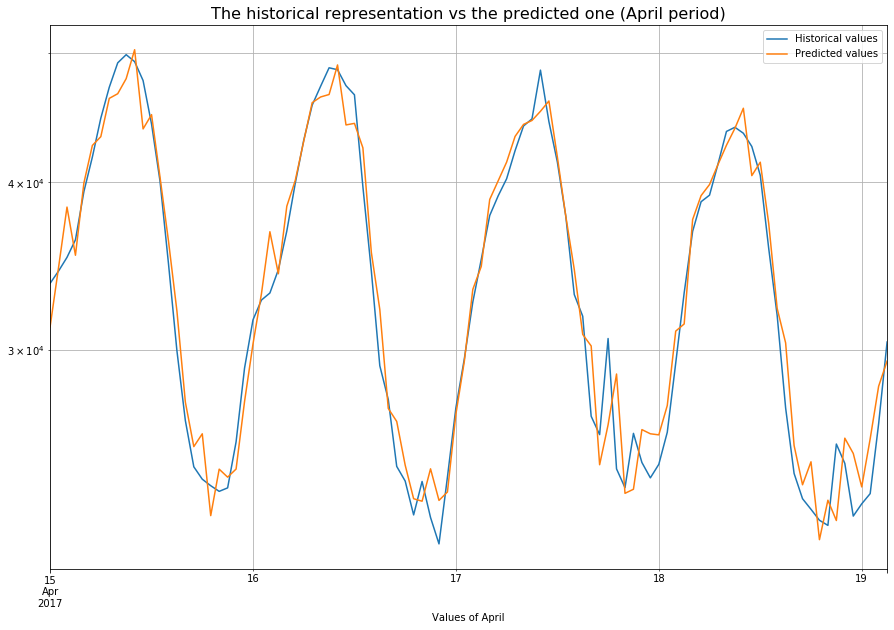

In [29]:
train_df['inverse_boxcox_model'] = inverse_boxcox(best_model.fittedvalues, lmbda)
train_df.tail(100).plot(x='ds',y=['y','inverse_boxcox_model'])
plt.legend(loc="upper right",labels=['Historical values','Predicted values'])
plt.xlabel('Values of April')
plt.grid(True,which='both')
plt.yscale('log')
plt.title('The historical representation vs the predicted one (April period)',fontsize=16);